In [1]:
import numpy
from keras.datasets import mnist #28*28=768->(normalization)->256, softmax사용시 one_hot_encoding: input의 클래스만큼,output의 demension이 되어야
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils #

Using TensorFlow backend.


In [0]:
# load data
# 6만개중 5만 train, 1만 테스트로 구분해둠
(X_train, y_train), (X_test, y_test) = mnist.load_data()

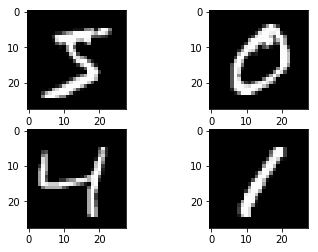

In [3]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # gray 스케일: 0~256으로 값으로 행렬 구성되는...
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
X_train.shape #(0~256사이즈 값이 들어가 있음) 

(60000, 28, 28)

In [28]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(num_pixels)


60000
28
28
784


In [6]:
X_train_cnv.shape

(60000, 784)

In [7]:
X_train_cnv[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [29]:
#normolization(평준화) ??
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

print(X_train_cnv[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
print(y_test)

[7 2 1 ... 4 5 6]


In [0]:
y_train = np_utils.to_categorical(y_train) # one_hot_encoding
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [30]:
print(y_test)
print(num_classes)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10


In [12]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')) #input:768, 히든레이어 dimension:768
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #출력 class 10

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W0620 02:15:53.036005 140378567497600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 02:15:53.057830 140378567497600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 02:15:53.060766 140378567497600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0620 02:15:53.090629 140378567497600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 02:15:53.115876 140378567497600 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 학습
history = model.fit(X_train_cnv, #768
    y_train, #one_hot_encoding
    epochs=10,
    batch_size=200, # 200개마다 weight 업데이트
    validation_split=0.1,
    shuffle=True, # validation input을 랜던함게 섞어서 사
    verbose=2
)

# 모델 정확도 분석 (scikit-learn의 score에 해당)
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

W0620 02:15:55.790595 140378567497600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0620 02:15:55.853020 140378567497600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 5s - loss: 0.2954 - acc: 0.9160 - val_loss: 0.1305 - val_acc: 0.9645
Epoch 2/10
 - 5s - loss: 0.1183 - acc: 0.9661 - val_loss: 0.0875 - val_acc: 0.9743
Epoch 3/10
 - 5s - loss: 0.0757 - acc: 0.9784 - val_loss: 0.0731 - val_acc: 0.9783
Epoch 4/10
 - 5s - loss: 0.0526 - acc: 0.9846 - val_loss: 0.0694 - val_acc: 0.9807
Epoch 5/10
 - 5s - loss: 0.0388 - acc: 0.9890 - val_loss: 0.0620 - val_acc: 0.9815
Epoch 6/10
 - 5s - loss: 0.0280 - acc: 0.9921 - val_loss: 0.0715 - val_acc: 0.9808
Epoch 7/10
 - 5s - loss: 0.0204 - acc: 0.9951 - val_loss: 0.0682 - val_acc: 0.9820
Epoch 8/10
 - 5s - loss: 0.0162 - acc: 0.9961 - val_loss: 0.0659 - val_acc: 0.9817
Epoch 9/10
 - 5s - loss: 0.0109 - acc: 0.9981 - val_loss: 0.0632 - val_acc: 0.9825
Epoch 10/10
 - 5s - loss: 0.0084 - acc: 0.9986 - val_loss: 0.0643 - val_acc: 0.9840
Baseline Error: 1.81%


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

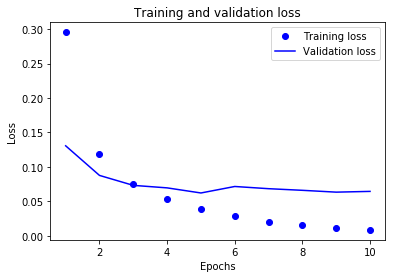

In [15]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

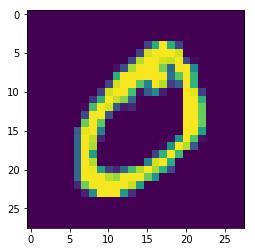

In [16]:
plt.imshow(X_train[1])
plt.show()

In [17]:
input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

[0]


Saving output.jpg to output.jpg
Upload file "output.jpg" with length 608 bytes


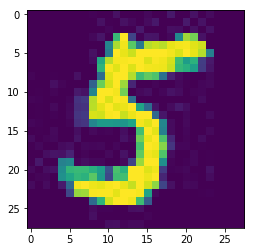

In [21]:
# 테스트 이미지가 output.jpg인 경우
#from google.colab import drive
#drive.mount('/content/gdrive')

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

#im = imread("/content/gdrive/My Drive/NLP-Lab/output.jpg")

from google.colab import files
#파일업로드창 출력
uploaded = files.upload()

#업로드한 파일정보 출력
for fn in uploaded.keys():
  print('Upload file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

im = imread("output.jpg")
  
plt.imshow(im)
plt.show()

In [0]:
#모델 저장 및 재로딩(상용화할)
#from keras.models import load_model
#model.save('/content/gdrive/My Drive/digit_classification.h5')

# model을 일단 날리고 다시 로드
#del model  
#model = load_model('/content/gdrive/My Drive/digit_classification.h5')


In [22]:
im.shape

(28, 28)

In [24]:
input = im
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

[5]


In [0]:
from keras.models import load_model
model.save('digit_classification.h5')

# model을 일단 날리고 다시 로드
del model  
model = load_model('digit_classification.h5')

In [31]:
pr = model.predict_classes(X)
print (pr)

pr = model.predict(X)
print (pr)

[5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [0]:
# 특정 레이어의 weights를 얻어내서 저장하고 싶다면
# layer.get_weights()를 호출하고 그 결과를 numpy.save로 저장

# 저장된 weights를 읽어다가 (numpy.load) 다시 로드하고 싶다면
# layer.set_weights(weights)를 사용. Refer to https://stackoverflow.com/questions/44644800/is-it-possible-to-save-a-trained-layer-to-use-layer-on-keras